In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data file as variable
stroke_predictive_path = "data/healthcare-dataset-stroke-data.csv"

In [2]:
# Read .csv file
stroke_predictive_df = pd.read_csv(stroke_predictive_path)

# Display preview of data
stroke_predictive_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Find number of individual participants
stroke_predictive_df["id"].nunique()
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Change columns to all lower case to match
stroke_predictive_df = stroke_predictive_df.rename(columns=str.lower)
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Check of dublicate IDs
# None found
duplicate_check = stroke_predictive_df.drop_duplicates(subset=["id"])
print(len(duplicate_check))

5110


In [6]:
# Check if any columns should be dropped
# All look appropriate, but bmi has 111 fewer rows of data
stroke_predictive_df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [7]:
# Drop rows with missing data so all match bmi's total
stroke_predictive = stroke_predictive_df.dropna(how='any')
stroke_predictive.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [8]:
# 895 subjects are minors 18 and under
# 574 subjects are children 12 and under
# 953 subjects are sections 65 and over

minor_check = stroke_predictive[stroke_predictive.age <= 18]
senior_check = stroke_predictive[stroke_predictive.age >= 65]
child_check = stroke_predictive[stroke_predictive.age <= 12]
print(minor_check["id"].nunique(), 
      child_check["id"].nunique(), 
      senior_check["id"].nunique())

895 574 953


In [9]:
# Unique entries for column work_type (5)
# Clean
stroke_predictive["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
# Unique entries for column ever_married (2)
# Clean
stroke_predictive["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
# Unique entries for column residence_type (2)
# Clean
stroke_predictive["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
# Unique entries for column smoking_status (4)
# Clean
stroke_predictive["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

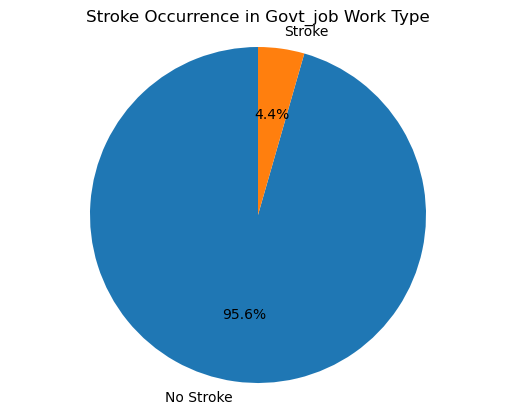

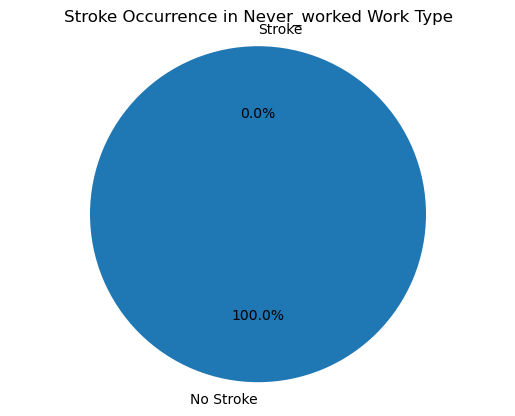

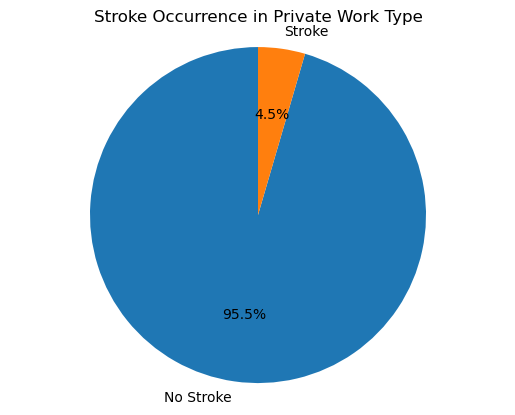

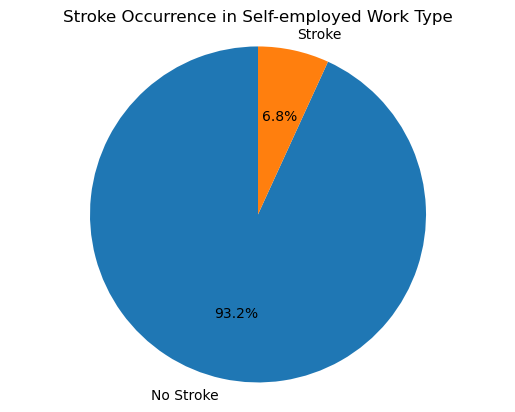

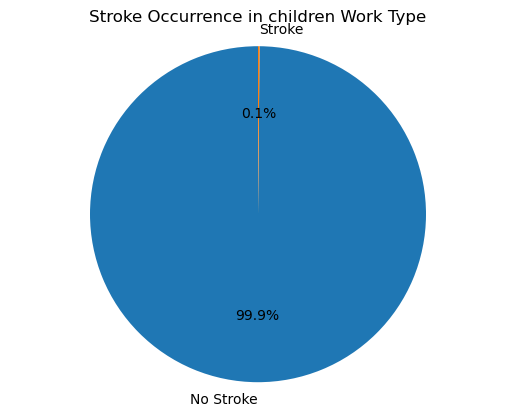

In [14]:
#Group data by work type and stroke then count
work_type_count = stroke_predictive.groupby(["work_type" , "stroke"]).size().unstack(fill_value=0)
for work_type in work_type_count.index: 
    counts = work_type_count.loc[work_type]
    plt.pie(counts,labels=["No Stroke" , "Stroke"] , autopct= "%1.1f%%" , startangle=90)
    plt.title(f"Stroke Occurrence in {work_type} Work Type")
    plt.axis("equal")
    plt.show()

In [ ]:
#Group data by work type and stroke then count
work_type_count = stroke_predictive.groupby(["work_type" , "stroke"]).size().unstack(fill_value=0)
#Creating bar chart
bars_2 = work_type_count.plot(kind="bar" , figsize=(10 , 6))
#Adding labels and title
plt.title("Number of People by Work Type and Stroke Status")
plt.xlabel("Work type")
plt.ylabel("Number of people")
plt.xticks(rotation=45)
plt.legend(["No Stroke" , "Stroke"] , title= "Stroke Status")
#Adding the number of people ontop of each bar 
for bar in bars_2.containers:
    bars_2.bar_label(bar, fmt="%d" , padding= 3)
#Saving the chart
plt.savefig("data/Number of People by Work Type and Stroke Status")
#display the chart
plt.tight_layout()
plt.show()
